# Smart Retail Solutions Limited
## About the company
## Problem statement
A retail company aims to improve customer engagement and increase sales by
implementing a Customer SegmentaƟon & RecommendaƟon System using Machine Learning (ML)
techniques. The company wants to divide its customer base into disƟnct segments based on their
purchasing behavior and preferences. AddiƟonally, they want to develop a recommendaƟon system that
provides personalized product recommendaƟons to customers within each segment.
## OBjectives
* Segment customers into meaningful groups based on their purchasing behavior, and other
relevant factors.
* Develop a recommendaƟon system that suggests products tailored to the preferences and
interests of each customer segment.
* Enhance customer experience and increase sales by providing targeted and personalized
recommendaƟons.
* Evaluate the performance of the segmentaƟon and recommendaƟon system through metrics
such as customer engagement, conversion rates, and revenue growth.

By addressing this business problem, the retail company can leverage machine learning technology to
segment its customer base, deliver personalized recommendaƟons, and drive business growth through
enhanced customer engagement and sales.

### Data soucre

In [72]:
# Importing the important libraries

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

%matplotlib inline




In [73]:
# Loading the dataset

data = pd.read_csv('data.csv', encoding='latin1')

# Display the first few rows of the DataFrame

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Exploratory Data Analysis


In [74]:
#Checking the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [75]:
# A preview of the first 5 columns
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [76]:
#Checking shape of the dataset: 
data.shape

(541909, 8)

In [77]:
#A summary of the dataset
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [78]:
#Checking for missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [79]:
#Number of unique customer id's 
data["CustomerID"].nunique()

4372

In [80]:
#Finding the number of invoices that are cancelled. 

# Filter rows where 'InvoiceNo' column starts with 'C'
cancelled_invoices = data[data["InvoiceNo"].str.startswith("C")]

# Count the number of rows in the filtered DataFrame
count_cancelled_invoices = cancelled_invoices.shape[0]

print("Number of cancelled invoices:", count_cancelled_invoices)


Number of cancelled invoices: 9288


### Inferences
* Missing data in collumns Description and CustomerID

* Negative data in collumns Quantity and Unit price

* Precense of outliers in quantity and unit price 

* Presense of 10147 duplicate entries

* Presence of invoices that have been cancelled

* Column data types are not correctly formatted


In [81]:
#dropping the cancelled invoices
# Filter rows where 'InvoiceNo' column does not start with 'C' (i.e., keep non-cancelled invoices)
non_cancelled_invoices = data[~data["InvoiceNo"].str.startswith("C")]

# Print the shape of the DataFrame before dropping cancelled invoices
print("Shape of DataFrame before dropping cancelled invoices:", data.shape)

# Drop cancelled invoices from the original DataFrame
data = non_cancelled_invoices

# Print the shape of the DataFrame after dropping cancelled invoices
print("Shape of DataFrame after dropping cancelled invoices:", data.shape)


Shape of DataFrame before dropping cancelled invoices: (541909, 8)
Shape of DataFrame after dropping cancelled invoices: (532621, 8)


In [82]:
#dropping the missing values from customer id and description column
data = data.dropna(subset = ["CustomerID", "Description"])

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


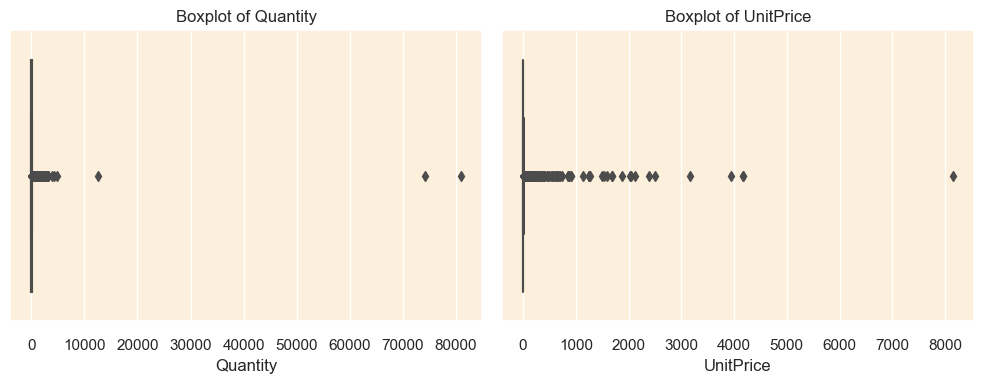

In [84]:
#Cheking for outliers
# Set the size of the overall figure
plt.figure(figsize=(10, 4))

# Create subplots for Quantity and UnitPrice
plt.subplot(1, 2, 1)
sns.boxplot(x=data['Quantity'])
plt.title('Boxplot of Quantity')
plt.xlabel('Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['UnitPrice'])
plt.title('Boxplot of UnitPrice')
plt.xlabel('UnitPrice')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



Outliers will not be removed in this stage as they are essential to the feature engineering stage. 

In [85]:
#Changing to suitable data types

# Convert 'InvoiceNo' to numeric
data.loc[:, 'InvoiceNo'] = pd.to_numeric(data['InvoiceNo'], errors='coerce')

# Convert 'Description' to string
data.loc[:, 'Description'] = data['Description'].astype(str)

# Convert 'Quantity' to numeric
data.loc[:, 'Quantity'] = pd.to_numeric(data['Quantity'])

# Convert 'InvoiceDate' to datetime
data.loc[:, 'InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Convert 'UnitPrice' to float
data.loc[:, 'UnitPrice'] = data['UnitPrice'].astype(float)

# Convert 'CustomerID' to numeric
data.loc[:, 'CustomerID'] = pd.to_numeric(data['CustomerID'])

# Convert 'Country' to string (object)
data.loc[:, 'Country'] = data['Country'].astype(str)


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    397924 non-null  object 
 1   StockCode    397924 non-null  object 
 2   Description  397924 non-null  object 
 3   Quantity     397924 non-null  int64  
 4   InvoiceDate  397924 non-null  object 
 5   UnitPrice    397924 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      397924 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.3+ MB


In [87]:
# Check for negative values in 'Quantity'
negative_quantity = data[data['Quantity'] < 0]

# Check for values less than 1 in 'UnitPrice'
negative_unit_price = data[data['UnitPrice'] < 1]

# Check for values equal to 0 in 'UnitPrice'
zero_unit_price = data[data['UnitPrice'] == 0]

# Print the number of rows with negative values in each column
print("Number of rows with negative values in 'Quantity':", len(negative_quantity))
print("Number of rows with values less than 1 in 'UnitPrice':", len(negative_unit_price))
print("Number of rows with values equal to 0 in 'UnitPrice':", len(zero_unit_price))



Number of rows with negative values in 'Quantity': 0
Number of rows with values less than 1 in 'UnitPrice': 93013
Number of rows with values equal to 0 in 'UnitPrice': 40


In [88]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Unit price can be in decimals as well e.g 0.85 pounds

# Feature engineering
## Recency: Calculating how recently the customer has engaged with the system

In [89]:
import pandas as pd

# Convert InvoiceDate to datetime type
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract only the date from InvoiceDate
data['InvoiceDay'] = data['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = data.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = data['InvoiceDay'].max()

# Convert most recent date to datetime type
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - pd.to_datetime(customer_data['InvoiceDay'])).dt.days

# Drop the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [90]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


## Frequency: Create two features about the frequency of products bought and the number of times a customer interacted with the system.

In [91]:
# Calculate the total number of transactions made by each customer
total_transactions = data.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = data.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,1,74215
1,12347.0,2,7,2458
2,12348.0,75,4,2341
3,12349.0,18,1,631
4,12350.0,310,1,197


## Monentary: Create features about how a customer spends their money

In [92]:
# Calculate the total spend by each customer
data['Total_Spend'] = data['UnitPrice'] * data['Quantity']
total_spend = data.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,1,74215,77183.60,77183.600000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2341,1797.24,449.310000
3,12349.0,18,1,631,1757.55,1757.550000
4,12350.0,310,1,197,334.40,334.400000


# Product Diversity: Create a feature about the number of distinct products a customer buys.

In [93]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = data.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,1,74215,77183.60,77183.600000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2341,1797.24,449.310000,22
3,12349.0,18,1,631,1757.55,1757.550000,73
4,12350.0,310,1,197,334.40,334.400000,17


# Behavioral Features: Create features that gives us the customer preferences in regards to when they like to shop(Average day between purchases, favorite shopping day and hour)

In [94]:
# Extract day of week and hour from InvoiceDate
data['Day_Of_Week'] = data['InvoiceDate'].dt.dayofweek
data['Hour'] = data['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = data.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = data.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = data.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
1,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19
2,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9
3,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16
4,12352.0,36,8,536,2506.04,313.255000,59,3.095238,1,14


# Geographic features: Understanding the location of the customers.

In [95]:
data['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890484
Germany           0.022723
France            0.020964
EIRE              0.018189
Spain             0.006245
Name: proportion, dtype: float64

In [96]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = data.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
1,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0
2,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0
3,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0
4,12352.0,36,8,536,2506.04,313.255000,59,3.095238,1,14,0


In [97]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    3850
0     417
Name: count, dtype: int64

# Get the seosonality and Trends of the customers

In [98]:
# Extract month and year from InvoiceDate
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = data.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,615.714286,341.070789,4.486071
1,12348.0,75,4,2341,1797.24,449.310000,22,9.433333,3,19,0,449.310000,301.159918,-160.884000
2,12349.0,18,1,631,1757.55,1757.550000,73,0.000000,0,9,0,1757.550000,0.000000,0.000000
3,12350.0,310,1,197,334.40,334.400000,17,0.000000,2,16,0,334.400000,0.000000,0.000000
4,12352.0,36,8,536,2506.04,313.255000,59,3.095238,1,14,0,626.510000,453.171921,-58.712000


In [99]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [100]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,615.714286,341.070789,4.486071
1,12348.0,75,4,2341,1797.24,449.31,22,9.433333,3,19,0,449.31,301.159918,-160.884
2,12349.0,18,1,631,1757.55,1757.55,73,0.0,0,9,0,1757.55,0.0,0.0
3,12350.0,310,1,197,334.4,334.4,17,0.0,2,16,0,334.4,0.0,0.0
4,12352.0,36,8,536,2506.04,313.255,59,3.095238,1,14,0,626.51,453.171921,-58.712


# Handling Outliers

In [101]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,615.714286,341.070789,4.486071,1,0
1,12348.0,75,4,2341,1797.24,449.31,22,9.433333,3,19,0,449.31,301.159918,-160.884,-1,1
2,12349.0,18,1,631,1757.55,1757.55,73,0.0,0,9,0,1757.55,0.0,0.0,-1,1
3,12350.0,310,1,197,334.4,334.4,17,0.0,2,16,0,334.4,0.0,0.0,1,0
4,12352.0,36,8,536,2506.04,313.255,59,3.095238,1,14,0,626.51,453.171921,-58.712,1,0


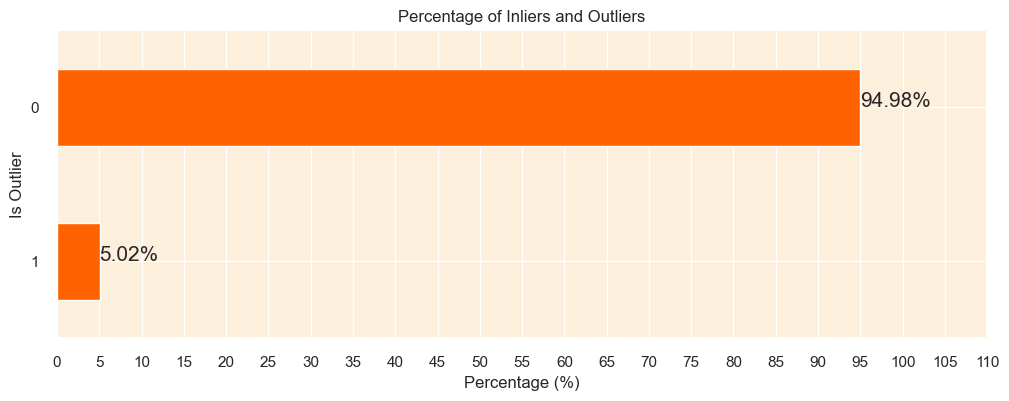

In [102]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='#ff6200')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

In [103]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [104]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]


4053

# Correlation Analysis

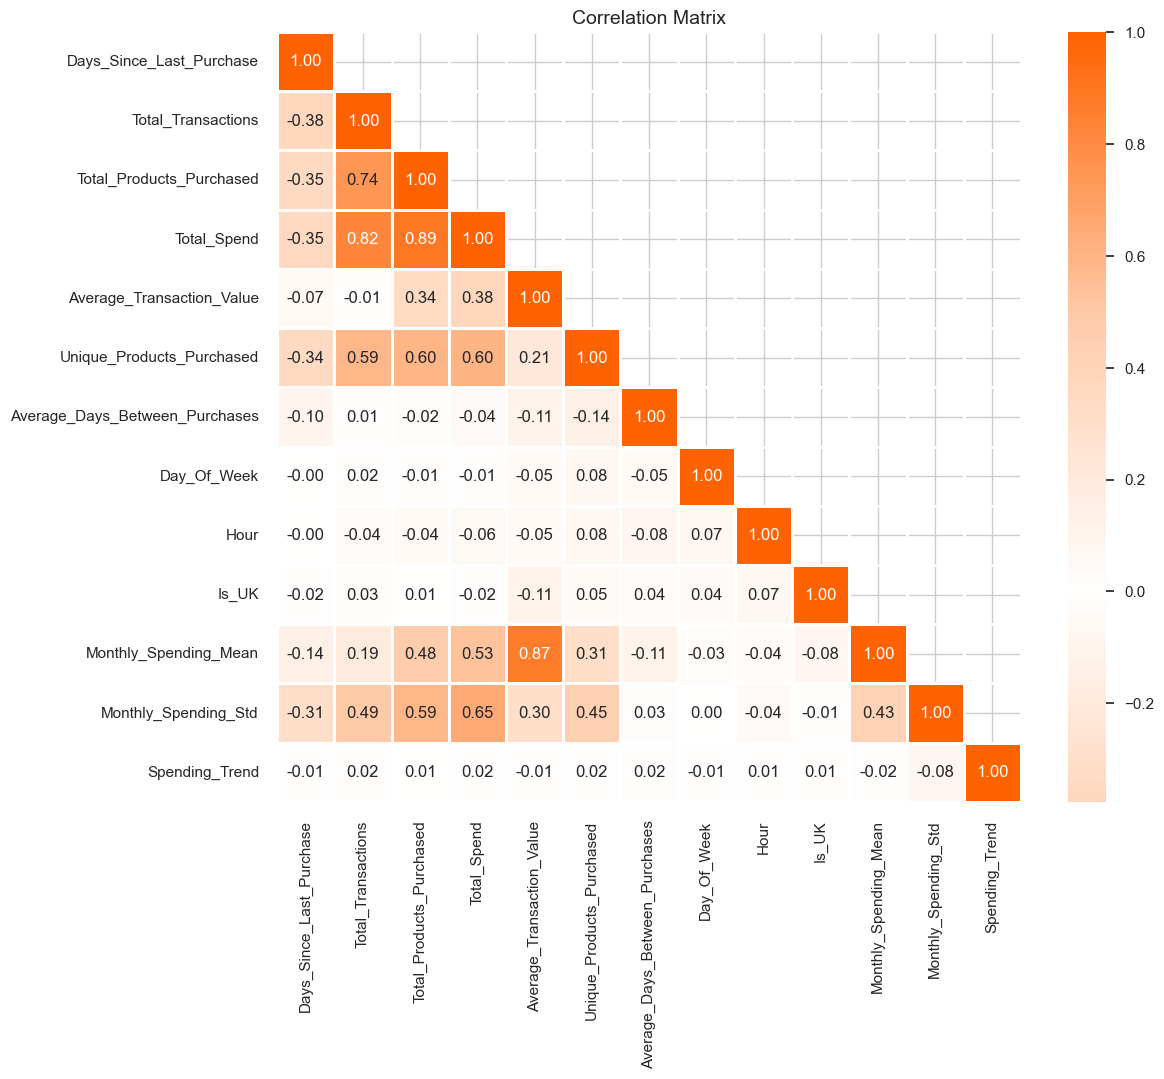

In [105]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#ff6200', '#ffcaa8', 'white', '#ffcaa8', '#ff6200']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

# Feature Scaling

In [106]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()


,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12347.0,-0.911844,0.878154,1.986380,2.185907,1.270181,0.788043,-0.119446,1,0.647455,0,0.837500,1.492550,0.073030
1,12350.0,2.200941,-0.669418,-0.557350,-0.581263,0.032221,-0.643761,-0.338128,2,1.517093,0,-0.159773,-0.705940,0.045028
2,12352.0,-0.568225,1.136083,-0.175959,0.930281,-0.060830,0.055492,-0.002473,1,0.647455,0,0.875771,2.215137,-0.321447
3,12353.0,1.129658,-0.669418,-0.756483,-0.752071,-1.047694,-0.860196,-0.338128,3,1.951912,0,-1.029728,-0.705940,0.045028
4,12354.0,1.412638,-0.669418,-0.182709,-0.062715,3.310690,0.038843,-0.338128,3,0.212635,0,2.481287,-0.705940,0.045028


# Dimensionality Reduction(PCA): To address the high multicolinearity between certain features

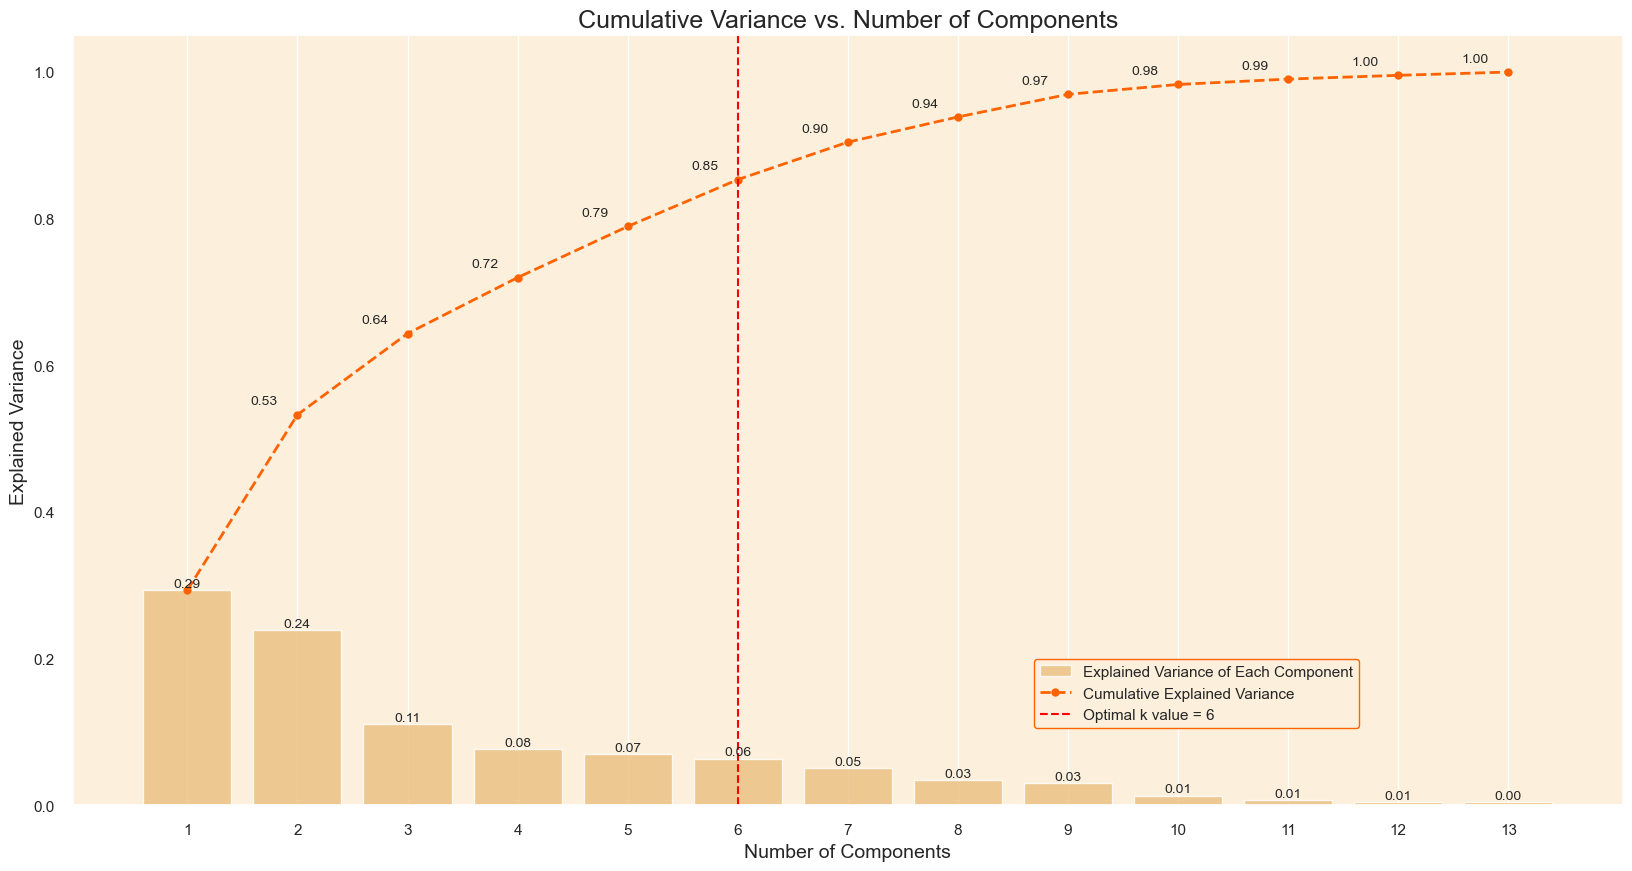

In [107]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [108]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index


In [109]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12347.0,3.725877,-1.673407,0.144857,-0.427310,-0.046869,0.563698
12350.0,-1.812134,-0.464835,1.004703,-1.378282,0.074784,0.235659
12352.0,1.924415,-1.585176,-0.303177,-0.205752,0.588995,0.699210
12353.0,-2.324495,0.640632,-0.327892,-1.603893,0.168090,0.678335
12354.0,0.680793,0.190356,4.212339,-0.009518,-0.475796,0.295488
